# Лабораторная работа "Цифровой осциллограф"
Радиофизическая лаборатория, ФРКТ МФТИ

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def analyse(file, const_level=0, window='boxcar'):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    plt.rcParams['font.size'] = '12'
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
        
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
#     plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
#     plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
#     plt.show()

<IPython.core.display.Javascript object>


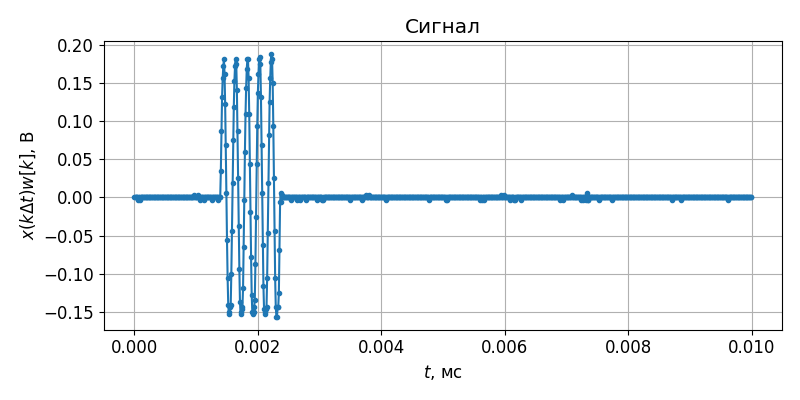

<IPython.core.display.Javascript object>


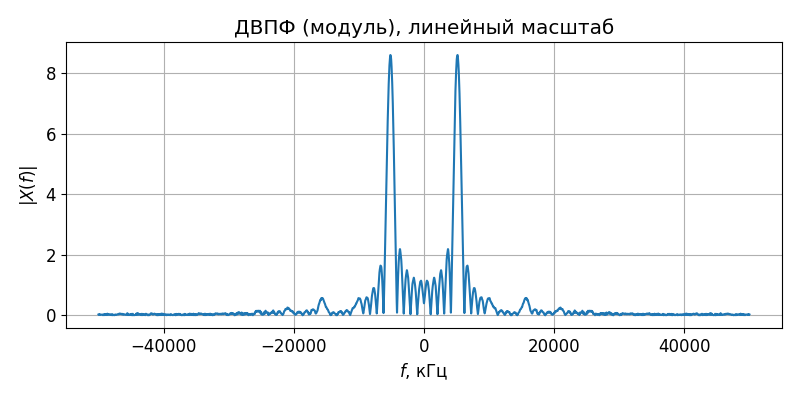

<IPython.core.display.Javascript object>


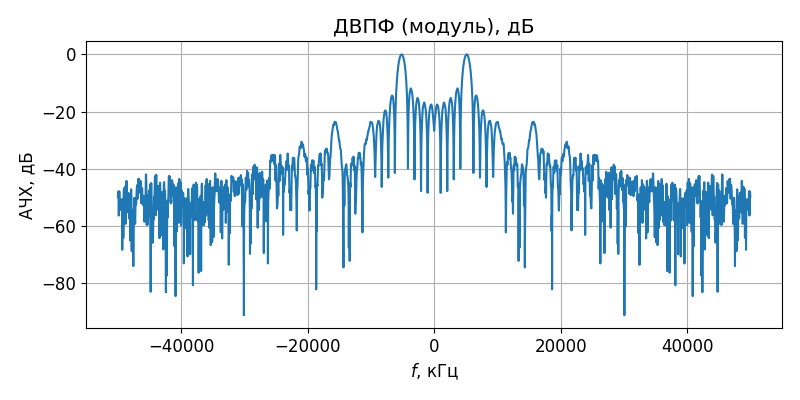

In [6]:
analyse(file='1.3)n1.txt', const_level=0, window='boxcar')

<IPython.core.display.Javascript object>


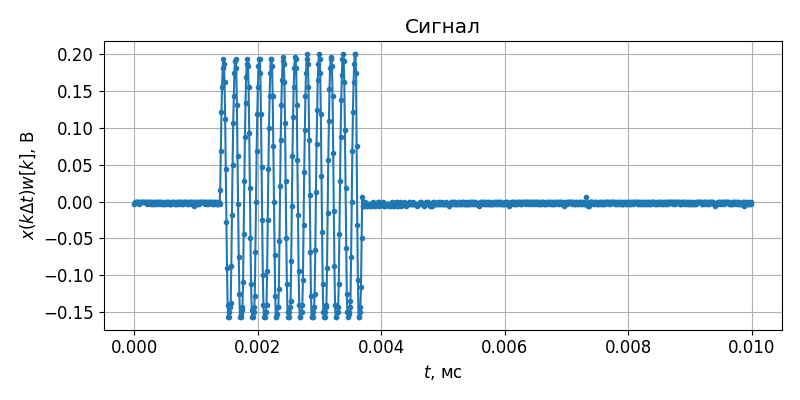

<IPython.core.display.Javascript object>


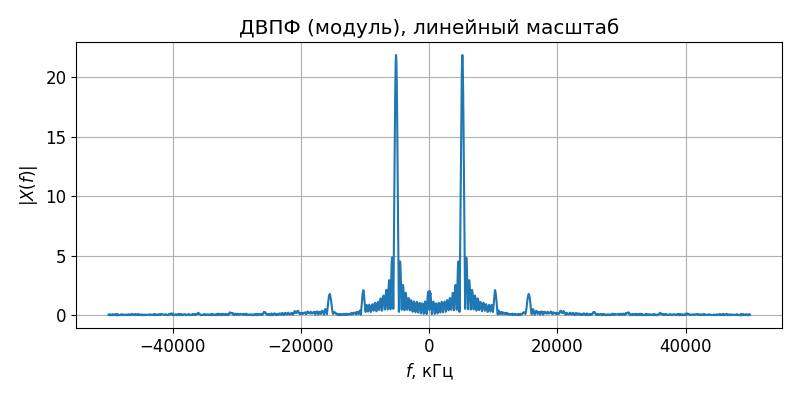

<IPython.core.display.Javascript object>


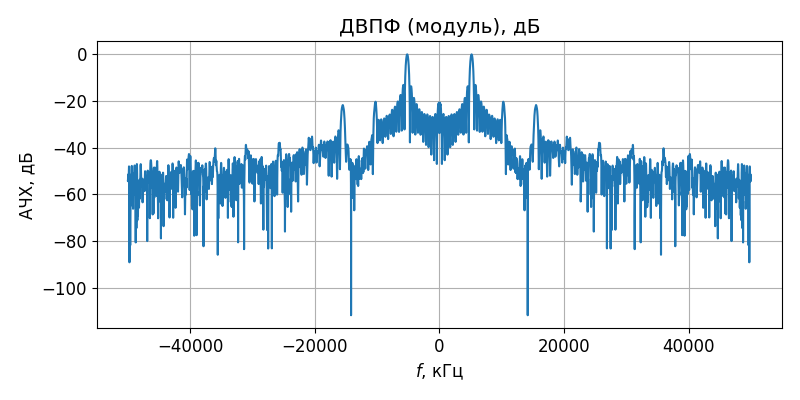

In [7]:
analyse(file='1.3)n2.txt', const_level=0, window='boxcar')

<IPython.core.display.Javascript object>


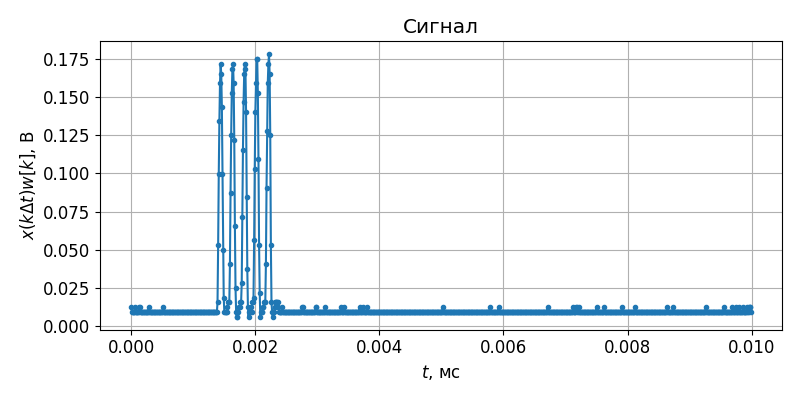

<IPython.core.display.Javascript object>


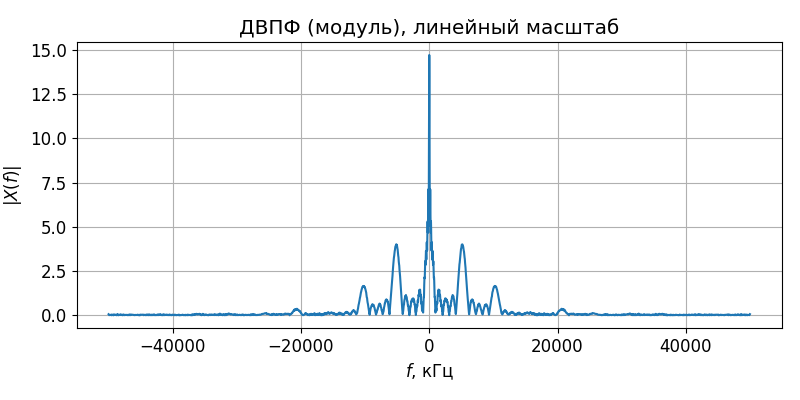

<IPython.core.display.Javascript object>


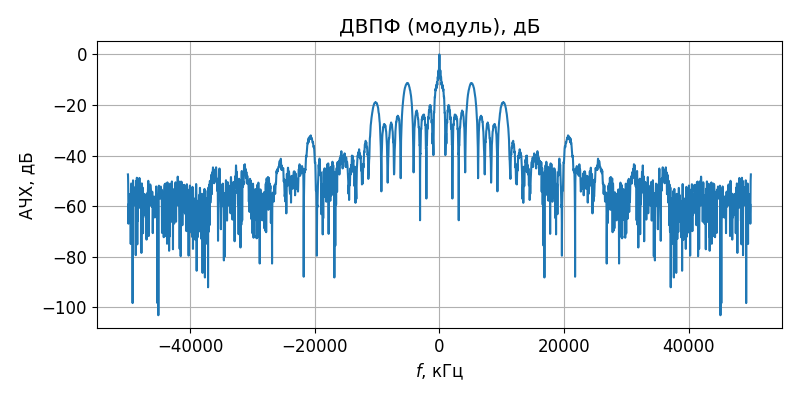

In [4]:
analyse(file='1.4)n1.txt', const_level=-0.01555, window='boxcar')

<IPython.core.display.Javascript object>


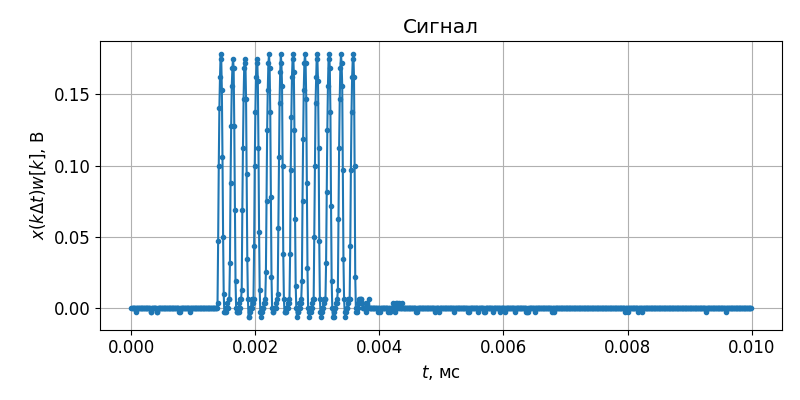

<IPython.core.display.Javascript object>


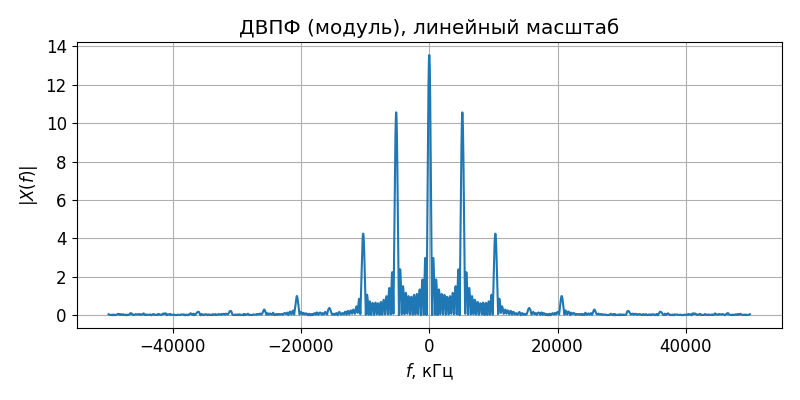

<IPython.core.display.Javascript object>


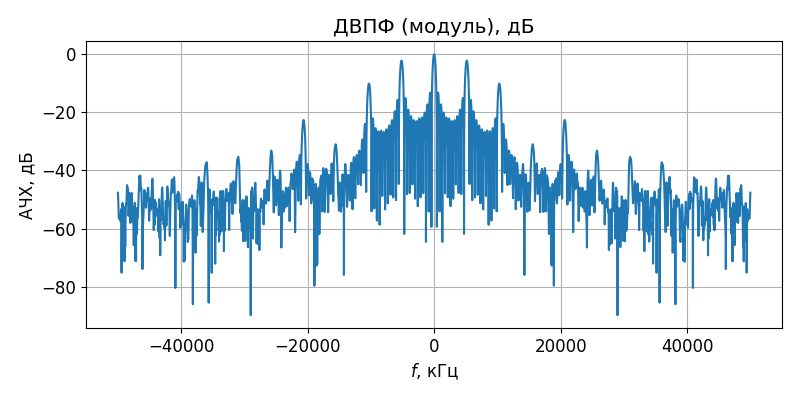

In [9]:
analyse(file='1.4)n2.txt', const_level=-0.01250, window='boxcar')

# 1.5

| Число периодов синусоиды | Ширина главного лепестка на уровне -3 Дб в кГц | Ширина главного лепестка на уровне —6дБ в кГц | Уровни первых боковых лепестков (левого и правого) относительно главного в дБ | Оценка частоты синусоиды по положению главного максимума, кГц |
|--------------------------|------------------------------------------------|----------|--------|--------|
| 5   | 900   | 1250   | left: -11.96, right: -14.50 | 5150 |
| 12  | 380   | 525    | left: -13.6, right: -13.1   | 6150 |

# 1.6

Спектр сигнала

$X(\omega) = \frac{A}{2j}\delta(\omega - \omega_0) - \frac{A}{2j}\delta(\omega + \omega_0)$

Спектр прямоугольного окна

$W(\omega) = \tau\dfrac{\sin{(\omega\tau/2)}}{\omega\tau/2}$

Спектром обрезанного сигнала будет их свёртка

$Y(\omega) = \frac{A}{2j}\tau\dfrac{\sin{((\omega - \omega_0)\tau/2)}}{(\omega - \omega_0)\tau/2} - \frac{A}{2j}\tau\dfrac{\sin{((\omega + \omega_0)\tau/2)}}{(\omega + \omega_0)\tau/2}$

<IPython.core.display.Javascript object>


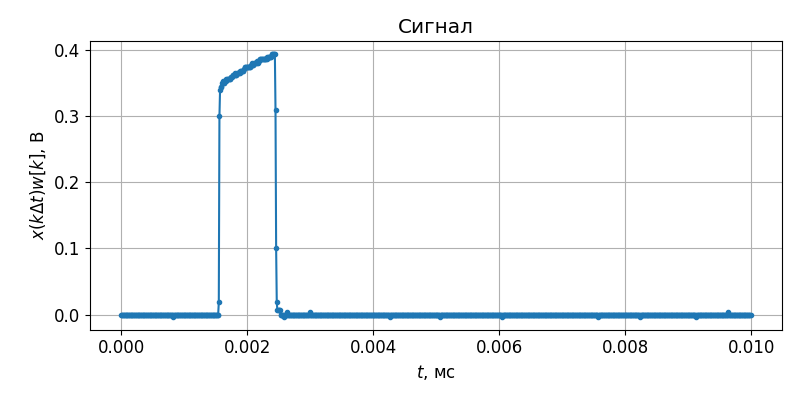

<IPython.core.display.Javascript object>


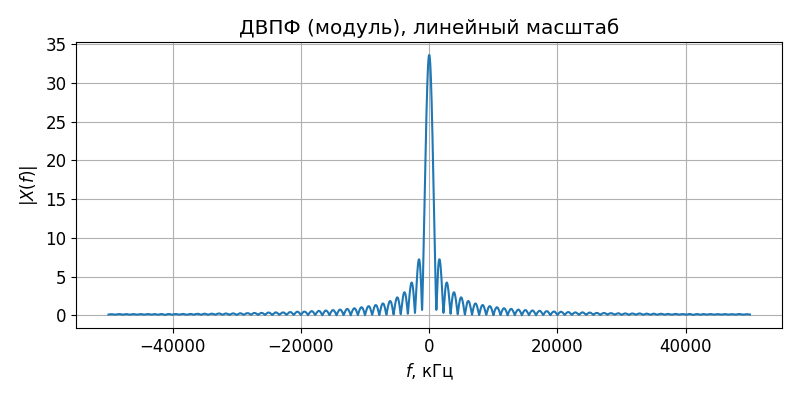

/tmp/ipykernel_8600/557623937.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=figsize)


<IPython.core.display.Javascript object>


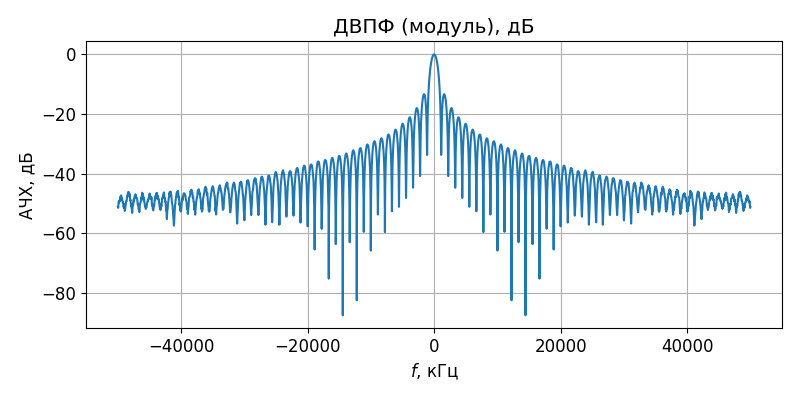

In [19]:
analyse(file='2.1)n1.txt', const_level=-0.03124, window='boxcar')

<IPython.core.display.Javascript object>


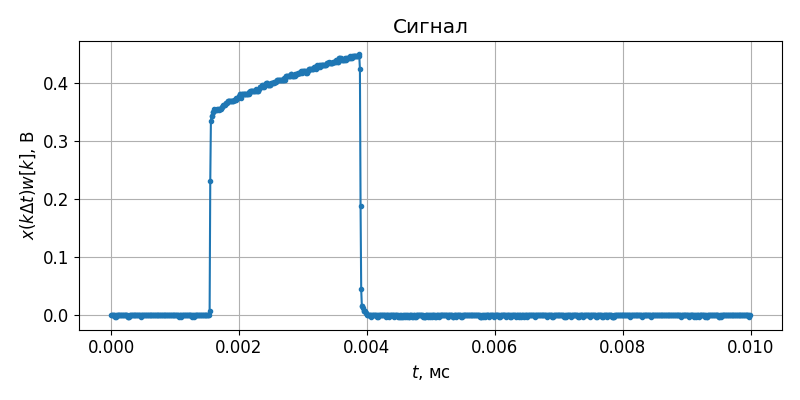

<IPython.core.display.Javascript object>


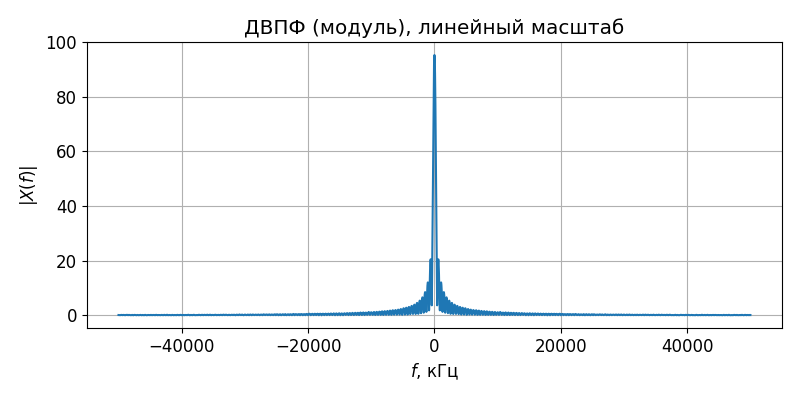

<IPython.core.display.Javascript object>


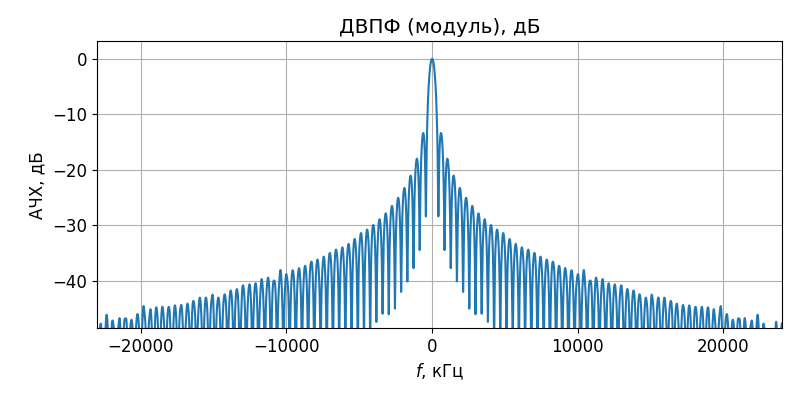

In [22]:
analyse(file='2.1)n2.txt', const_level=-0.0875, window='boxcar')

| Число периодов синусоиды | Ширина главного лепестка на уровне -3 Дб в кГц | Ширина главного лепестка на уровне —6дБ в кГц | Уровни первого бокового лепестка относительно главного в дБ |
|--------------------------|------------------------------------------------|----------|--------|
| 5   | 1000   | 1350  | -13.3 |
| 12  | 380    | 520   | -13.3|

<IPython.core.display.Javascript object>


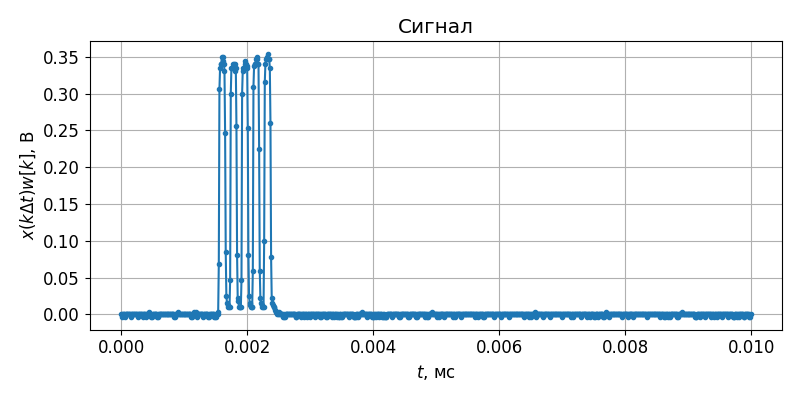

<IPython.core.display.Javascript object>


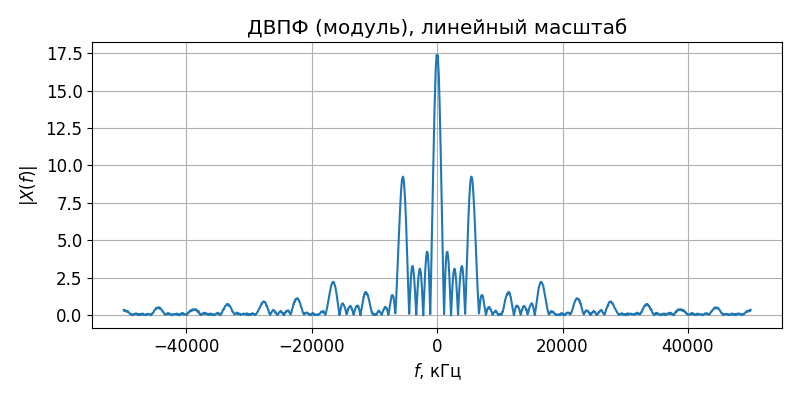

<IPython.core.display.Javascript object>


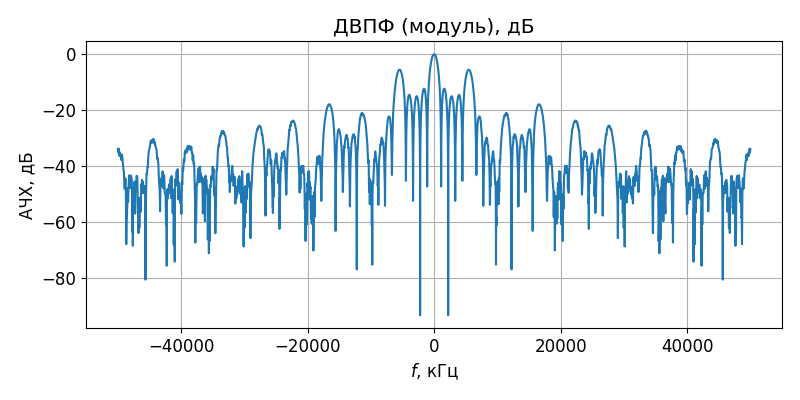

In [24]:
analyse(file='3.1)n1.txt', const_level=-0.01562, window='boxcar')

<IPython.core.display.Javascript object>


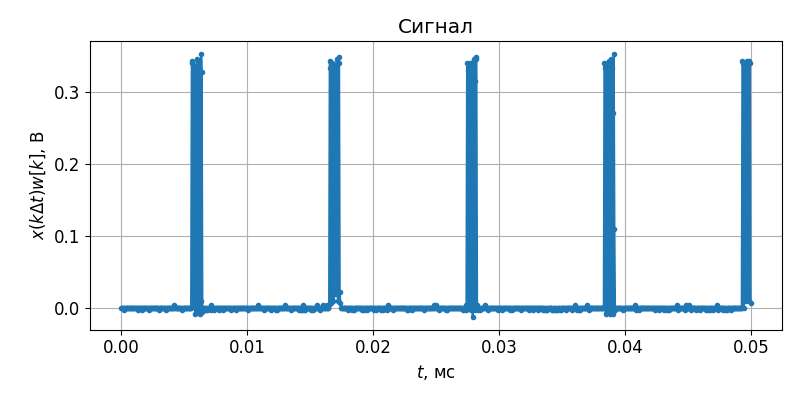

<IPython.core.display.Javascript object>


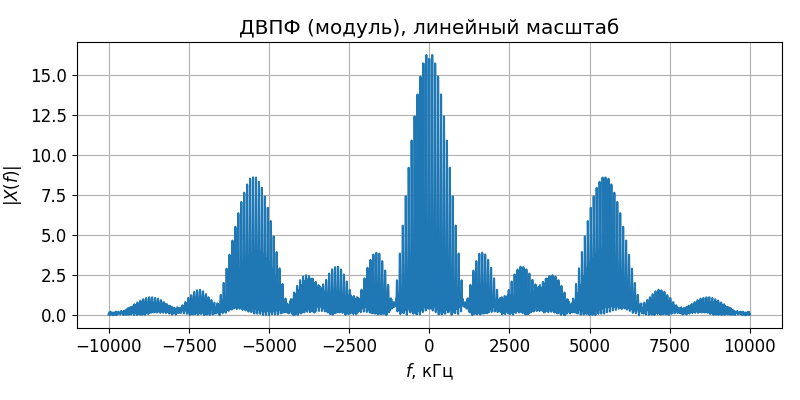

<IPython.core.display.Javascript object>


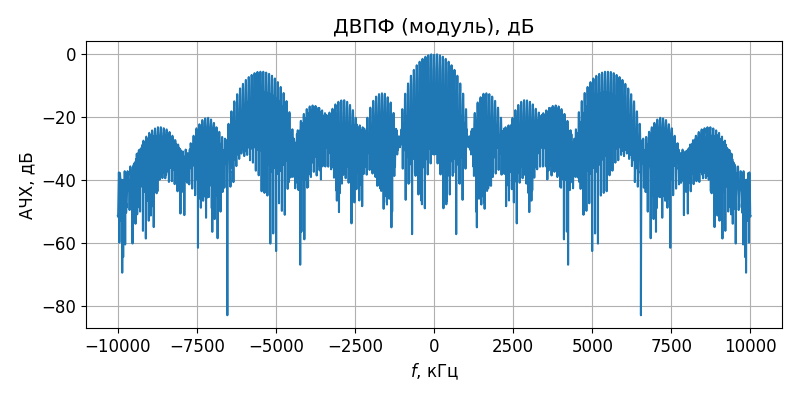

In [26]:
analyse(file='3.2)n1.txt', const_level=-0.01553, window='boxcar')

<IPython.core.display.Javascript object>


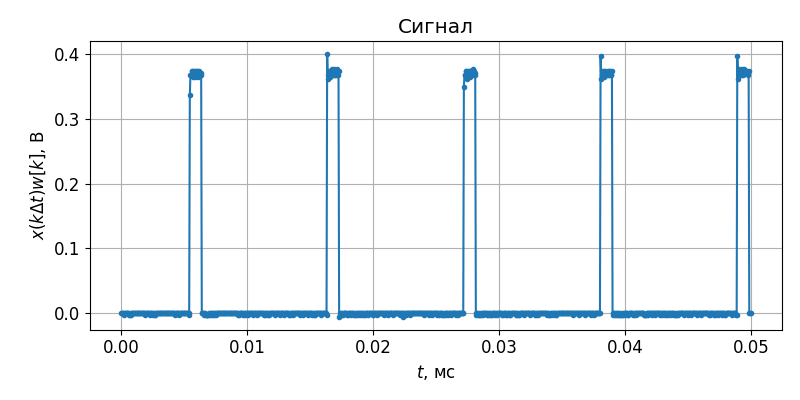

<IPython.core.display.Javascript object>


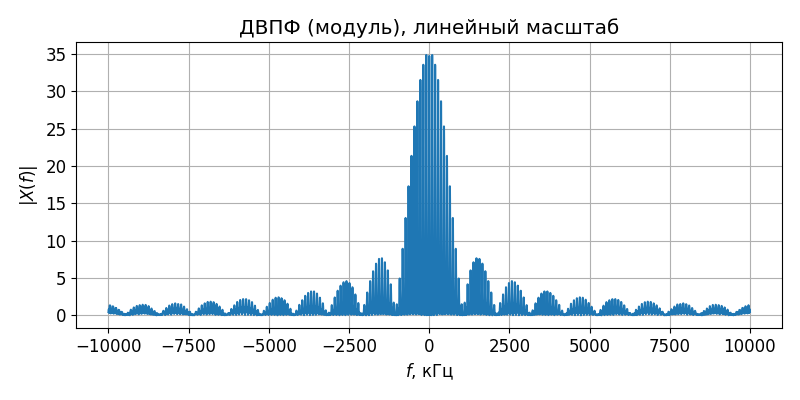

<IPython.core.display.Javascript object>


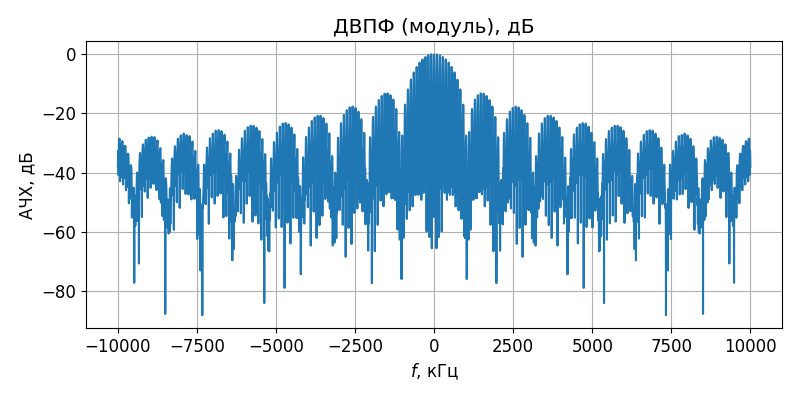

In [27]:
analyse(file='3.3).txt', const_level=-0.03124, window='boxcar')

# 3.4

$Y(\omega) = X(\omega)\sum\limits_{k=0}^n{e^{-i\omega k T}} = X(\omega)e^{-i\omega(N-1)T/2}\dfrac{\sin(\omega NT/2)}{\sin(\omega T/2)} = e^{-i\omega(N-1)T/2}\tau\dfrac{\sin{(\omega\tau/2)}}{\omega\tau/2}\dfrac{\sin(\omega NT/2)}{\sin(\omega T/2)} $